## Sales_Forecasting_m5 - sarima_baseline

STEP 3 — Baseline Forecasting with SARIMA


Purpose: Establish a statistically interpretable baseline forecasting model that captures trend and seasonality. All advanced models (Prophet, LSTM) must outperform this benchmark.

In [1]:
# 3.1 Import Libraries & Load Processed Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load processed data
store_daily_sales = pd.read_csv(
    "../data/processed/store_daily_sales.csv",
    parse_dates=["date"]
)

In [2]:
# 3.2 Select Store & Create Weekly Series
store_id = "CA_1"

store_ts = (
    store_daily_sales
    [store_daily_sales["store_id"] == store_id]
    .set_index("date")["sales"]
)

weekly_sales = store_ts.resample("W").sum()

In [3]:
# Sanity check
weekly_sales.head()
weekly_sales.tail()

date
2016-03-27    31470
2016-04-03    32464
2016-04-10    33294
2016-04-17    30551
2016-04-24    31646
Freq: W-SUN, Name: sales, dtype: int64

In [4]:
# 3.3 Train–Test Split (Time-Aware)
train_size = int(len(weekly_sales) * 0.8)

train = weekly_sales.iloc[:train_size]
test = weekly_sales.iloc[train_size:]

In [5]:
# 3.4 Fit SARIMA Model (Baseline)
sarima_model = SARIMAX(
    train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result = sarima_model.fit(disp=False) 

In [6]:
sarima_result.summary()

c:\Users\Jacy Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  219
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -2427.661
Date:                            Tue, 06 Jan 2026   AIC                           4865.321
Time:                                    17:03:54   BIC                           4878.914
Sample:                                01-30-2011   HQIC                          4870.836
                                     - 04-05-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0237        nan        nan        nan         nan         nan
ma.L1         -0.5169         -0        inf      0.000      -0.517      -0.517
ar.S.L52       0.2807   4.72e-31   5.95e+29      0.000       0.281       0.281
ma.S.L52    2.068e+14   1.68e-33   1.23e+47      0.000    2.07e+14    2.07e+14
sigma2        2.5e-11   1.81e-10      0.138      0.890    -3.3e-10     3.8e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.89   Prob(JB):                         0.43
Heteroskedasticity (H):               0.58   Skew:                            -0.17
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [7]:
# 3.5 Forecast on Test Period
forecast = sarima_result.forecast(steps=len(test))

In [8]:
# 3.6 Evaluate Forecast Accuracy
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 1431.01
RMSE: 1785.78


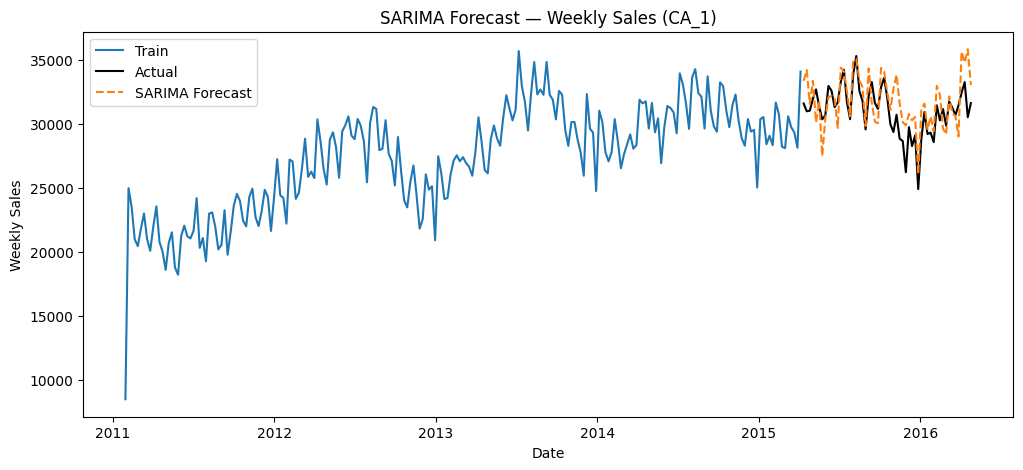

In [9]:
# 3.7 Plot Forecast vs Actual (SAVE THIS)
plt.figure(figsize=(12, 5))

plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual", color="black")
plt.plot(test.index, forecast, label="SARIMA Forecast", linestyle="--")

plt.title(f"SARIMA Forecast — Weekly Sales ({store_id})")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()

plt.savefig(
    "../visuals/sarima_forecast.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

# 3.8 Business Interpretation
A seasonal ARIMA model was used as a baseline to forecast weekly store-level sales.
The model captures both long-term trend and annual seasonality, providing a statistically interpretable benchmark.
Forecast accuracy was evaluated using RMSE and MAE on a held-out test period.
This baseline establishes the minimum performance threshold for more advanced forecasting models.